In [1]:
%load_ext autoreload
%autoreload 2

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from fnn.notebook.utils import *

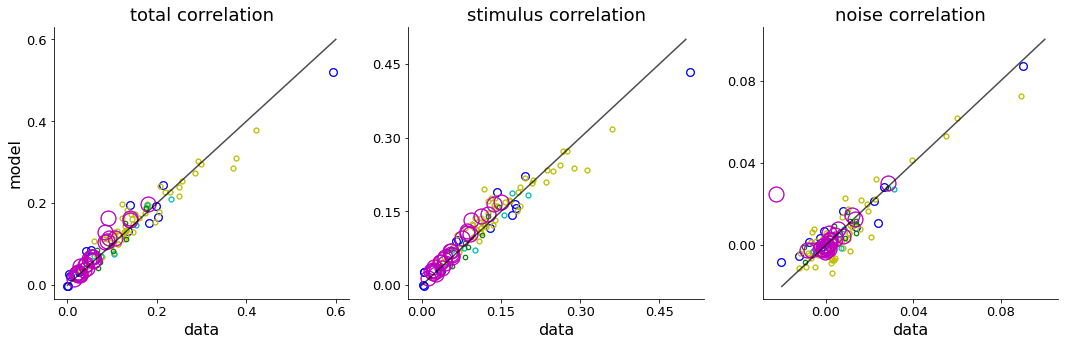

In [15]:
path = "./response_dict.npy"
data = np.load(path, allow_pickle=True).item()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

colors = ['b', 'y', 'c', 'g', 'm']
    
for key, color in zip(data.keys(), colors):
    
    single_trial = data[key]['recorded']
    pred_single_trial = data[key]['predicted']
    
    size = 2. * np.sqrt(single_trial.shape[0] * single_trial.shape[1] / 6000)
    num_cells = single_trial.shape[-1]
    diagonal_idxs = list(range(0, num_cells*num_cells, num_cells+1))
    
    recorded_corr = single_trial_corr_matrix(single_trial)
    pred_corr = single_trial_corr_matrix(pred_single_trial)
    recorded_stim_corr = stim_corr2(single_trial)
    recorded_noise_corr = noise_corr2(single_trial)
    pred_stim_corr = stim_corr2(pred_single_trial)
    pred_noise_corr = noise_corr2(pred_single_trial)
    
    recorded_corr = np.delete(recorded_corr.flatten(), diagonal_idxs)
    pred_corr = np.delete(pred_corr.flatten(), diagonal_idxs)
    recorded_stim_corr = np.delete(recorded_stim_corr.flatten(), diagonal_idxs)
    pred_stim_corr = np.delete(pred_stim_corr.flatten(), diagonal_idxs)
    recorded_noise_corr = np.delete(recorded_noise_corr.flatten(), diagonal_idxs)
    pred_noise_corr = np.delete(pred_noise_corr.flatten(), diagonal_idxs)
    
    ax[0].plot(recorded_corr, pred_corr, 'o', alpha=0.9, markersize=size, fillstyle='none', color=color)
    ax[1].plot(recorded_stim_corr, pred_stim_corr, 'o', alpha=0.9, markersize=size, fillstyle='none', color=color)
    ax[2].plot(recorded_noise_corr, pred_noise_corr, 'o', alpha=0.9, markersize=size, fillstyle='none', color=color)
    
ax[0].plot([0, 0.6], [0, 0.6], 'k-', alpha=0.7)
ax[1].plot([0, 0.5], [0, 0.5], 'k-', alpha=0.7)
ax[2].plot([-0.02, 0.1], [-0.02, 0.1], 'k-', alpha=0.7)
    
ax[0].set_xlabel('data', fontsize=16)
ax[0].set_ylabel('model', fontsize=16)
ax[0].set_title('total correlation', fontsize=18)
ax[1].set_xlabel('data', fontsize=16)
ax[1].set_title('stimulus correlation', fontsize=18)
ax[2].set_xlabel('data', fontsize=16)
ax[2].set_title('noise correlation', fontsize=18)

for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].tick_params(axis='both', which='major', labelsize=13)

plt.show()

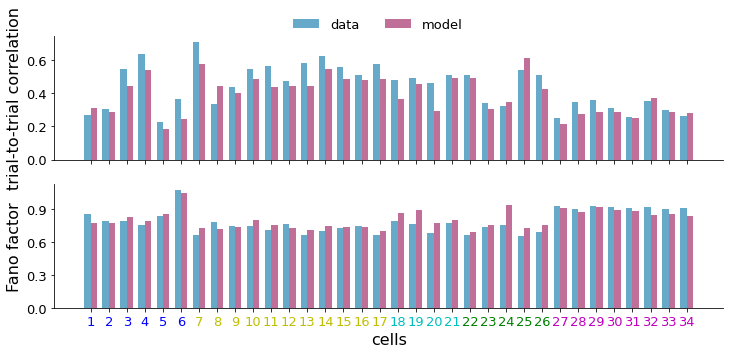

In [18]:
path = "./response_dict.npy"
data = np.load(path, allow_pickle=True).item()

recorded_trial_corr = []
pred_trial_corr = []
recorded_fano = []
pred_fano = []
indices = []
for i, key in enumerate(data.keys()):
    
    single_trial = data[key]['recorded']
    pred_single_trial = data[key]['predicted']
    
    num_cells = single_trial.shape[-1]
    indices.append(i * np.ones(num_cells).astype(np.int))
    diagonal_idxs = list(range(0, num_cells*num_cells, num_cells+1))
    
    recorded_stim_corr = stim_corr2(single_trial)
    recorded_trial_corr.append(recorded_stim_corr.flatten()[diagonal_idxs])
    pred_stim_corr = stim_corr2(pred_single_trial)
    pred_trial_corr.append(pred_stim_corr.flatten()[diagonal_idxs])
    
    recorded_fano.append(np.nanmean(np.var(single_trial, axis=0)/np.mean(single_trial, axis=0), axis=0))
    pred_fano.append(np.nanmean(np.var(pred_single_trial, axis=0)/np.mean(pred_single_trial, axis=0), axis=0))

recorded_trial_corr = np.concatenate(recorded_trial_corr, axis=0)
pred_trial_corr = np.concatenate(pred_trial_corr, axis=0)
recorded_fano = np.concatenate(recorded_fano, axis=0)
pred_fano = np.concatenate(pred_fano, axis=0)
indices = np.concatenate(indices, axis=0)

num_cells = recorded_trial_corr.shape[0]

colors = ['b', 'y', 'c', 'g', 'm']

fig, ax = plt.subplots(2, 1, figsize=(12, 5))
x = np.arange(num_cells)
width = 0.35
rects1 = ax[0].bar(x - width/2, recorded_trial_corr, width, label='data', color='#66A9C9')
rects2 = ax[0].bar(x + width/2, pred_trial_corr, width, label='model', color='#c06f98')
ax[0].set_ylabel('trial-to-trial correlation', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([])
ax[0].legend(fontsize=13, loc=(0.35,1), ncol=2, frameon=False)

x = np.arange(num_cells)
width = 0.35
rects1 = ax[1].bar(x - width/2, recorded_fano, width, label='data', color='#66A9C9')
rects2 = ax[1].bar(x + width/2, pred_fano, width, label='model', color='#c06f98')
ax[1].set_ylabel('Fano factor', fontsize=16)
ax[1].set_xlabel('cells', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels(x+1)

for label, idx in zip(ax[1].get_xticklabels(), indices):
    label.set_color(colors[idx])

for i in range(2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].tick_params(axis='both', which='major', labelsize=13)
plt.show()

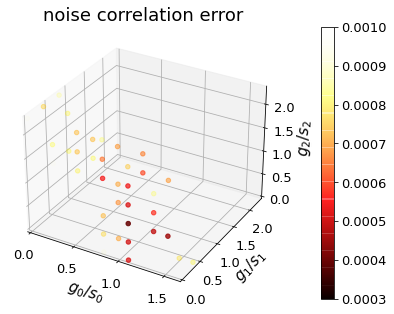

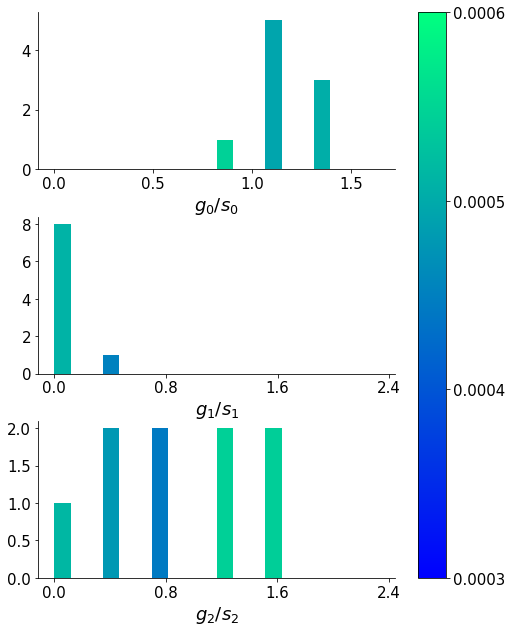

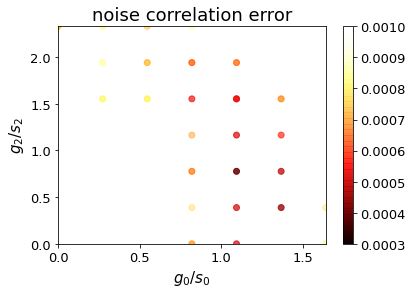

((1.202732871498489, 0.07753309839512301, 0.698380825395734),
 (0.06695640527372061, 0.07753309839512301, 0.14517232078462391))

In [99]:
s0, s1, s2 = (0.73166704, 0.05159087, 0.051547807)
g0s, g1s, g2s, stim_errors, noise_errors, var_errors = read_search_result('./errors_16-05-31.txt')
scatter_plot(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.001, stim_thre=0.013, var_thre=1.3, vmin=0.0003)
marginal_histogram(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0006, stim_thre=0.013, var_thre=1.3, vmin=0.0003)
scatter_projection(g0s, g2s, stim_errors, noise_errors, var_errors, s0, s2, noise_thre=0.001, stim_thre=0.013, var_thre=1.3, vmin=0.0003)
mean_best_coordinates(5, g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, stim_thre=0.013, var_thre=1.3)

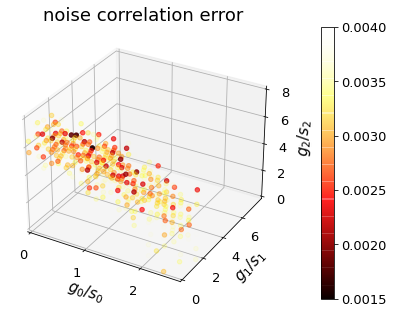

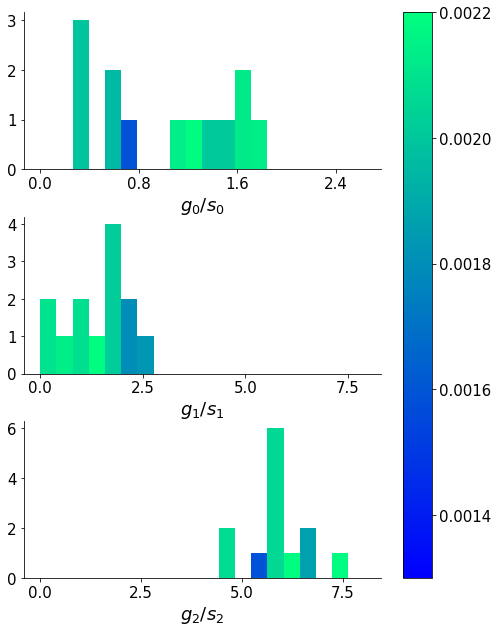

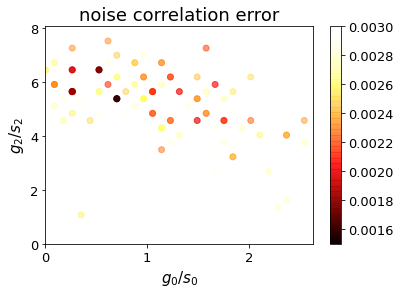

((0.6148219526486954, 1.686510171698594, 5.9032155507301125),
 (0.1944416499696486, 0.2713075774503313, 0.22401288334734606))

In [100]:
s0, s1, s2 = (0.7589189, 0.07589637, 0.08696955)
g0s, g1s, g2s, stim_errors, noise_errors, var_errors = read_search_result('./errors_21-03-15.txt')
scatter_plot(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.004, stim_thre=0.04, var_thre=2, vmin=0.0015)
marginal_histogram(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0022, stim_thre=0.04, var_thre=2, vmin=0.0013)
scatter_projection(g0s, g2s, stim_errors, noise_errors, var_errors, s0, s2, noise_thre=0.003, stim_thre=0.04, var_thre=2, vmin=0.0015)
mean_best_coordinates(5, g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, stim_thre=0.04, var_thre=2)

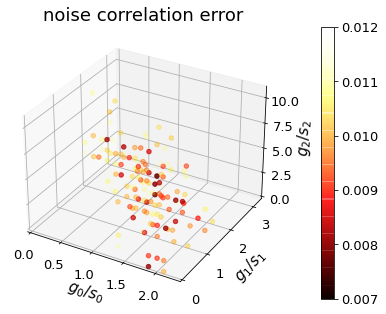

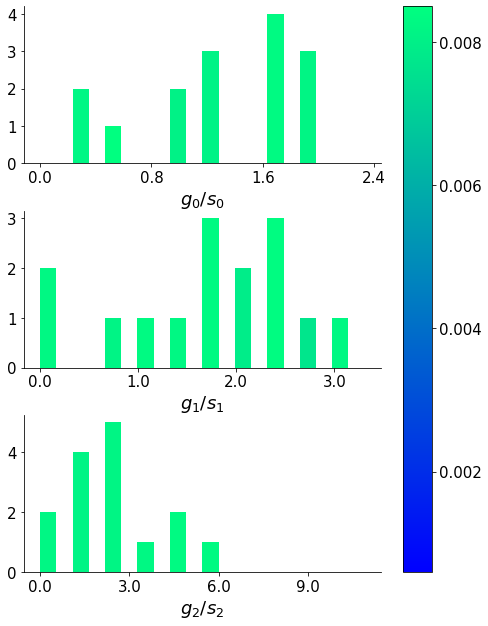

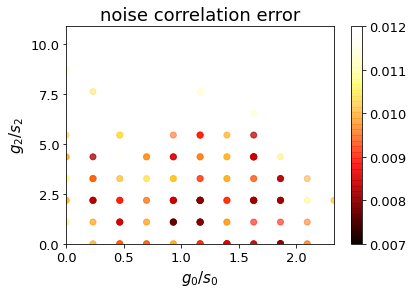

((1.3521217738970999, 1.6548857556238148, 1.3088510133582645),
 (0.17131078014593495, 0.44405244534851457, 0.40810600519320905))

In [101]:
s0, s1, s2 = (0.72922426, 0.030213566, 0.022920867)
g0s, g1s, g2s, stim_errors, noise_errors, var_errors = read_search_result('./errors_15-11-21b.txt')
scatter_plot(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.012, stim_thre=0.1, var_thre=2.5, vmin=0.007)
marginal_histogram(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0085, stim_thre=0.1, var_thre=2.5, vmin=0.0006)
scatter_projection(g0s, g2s, stim_errors, noise_errors, var_errors, s0, s2, noise_thre=0.012, stim_thre=0.1, var_thre=2.5, vmin=0.007)
mean_best_coordinates(5, g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, stim_thre=0.1, var_thre=2.5)

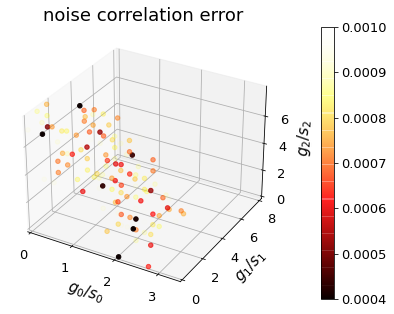

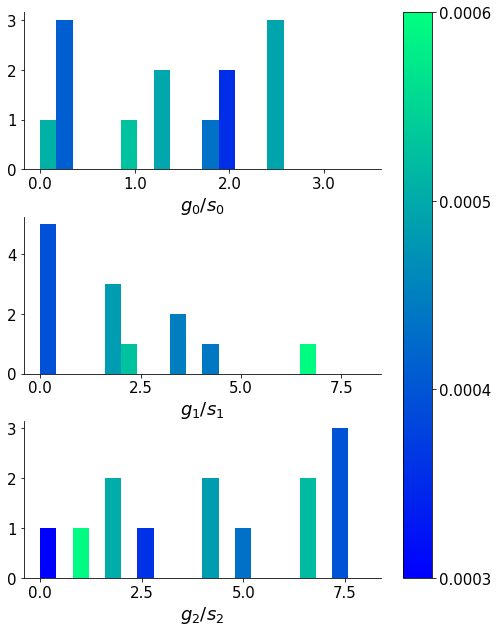

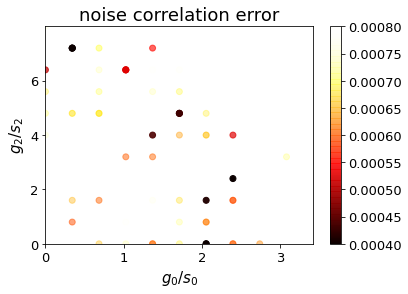

((1.4398862703772364, 0.9694893932043449, 3.675056901465254),
 (0.45222391388463, 0.6463262621362298, 1.486087172328793))

In [102]:
s0, s1, s2 = (0.72922426, 0.061888248, 0.062584065)
g0s, g1s, g2s, stim_errors, noise_errors, var_errors = read_search_result('./errors_15-10-07.txt')
scatter_plot(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.001, stim_thre=0.015, var_thre=1.5, vmin=0.0004)
marginal_histogram(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0006, stim_thre=0.015, var_thre=1.5, vmin=0.0003)
scatter_projection(g0s, g2s, stim_errors, noise_errors, var_errors, s0, s2, noise_thre=0.0008, stim_thre=0.015, var_thre=1.5, vmin=0.0004)
mean_best_coordinates(5, g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, stim_thre=0.015, var_thre=1.5)

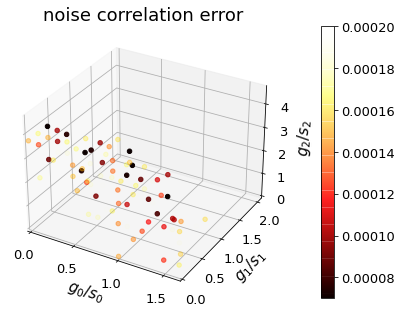

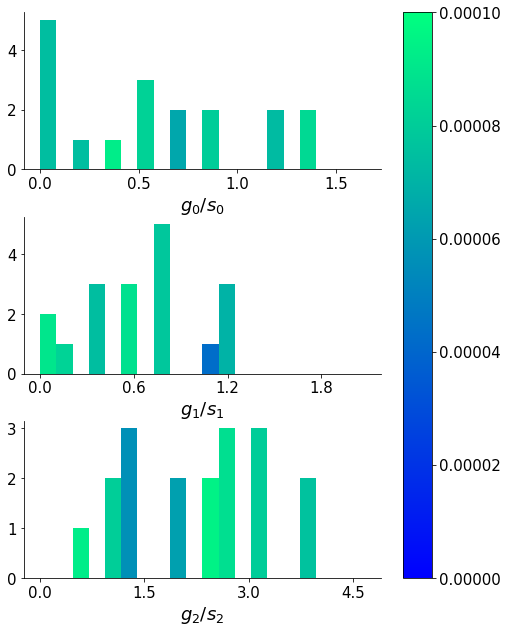

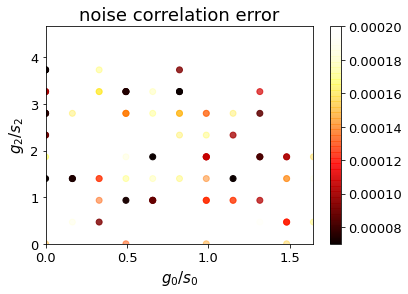

((0.5265869788808178, 0.8307348639069376, 2.3329591888916803),
 (0.22920337198629326, 0.14685456390916984, 0.4893656479458908))

In [103]:
s0, s1, s2 = (0.72922426, 0.09630028, 0.05358002)
g0s, g1s, g2s, stim_errors, noise_errors, var_errors = read_search_result('./errors_15-11-21a.txt')
scatter_plot(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0002, stim_thre=0.015, var_thre=1.5, vmin=0.00007)
marginal_histogram(g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, noise_thre=0.0001, stim_thre=0.015, var_thre=1.5, vmin=0.)
scatter_projection(g0s, g2s, stim_errors, noise_errors, var_errors, s0, s2, noise_thre=0.0002, stim_thre=0.015, var_thre=1.5, vmin=0.00007)
mean_best_coordinates(5, g0s, g1s, g2s, stim_errors, noise_errors, var_errors, s0, s1, s2, stim_thre=0.015, var_thre=1.5)

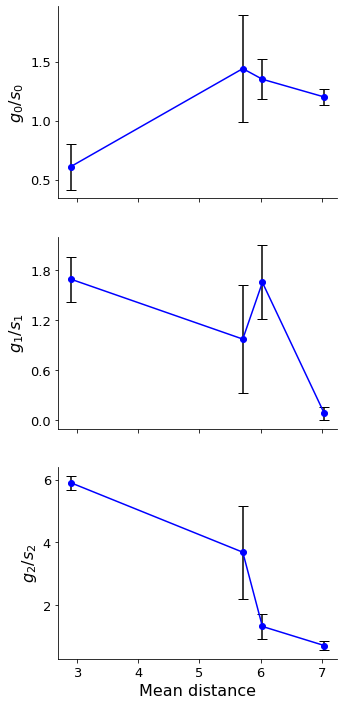

In [116]:
g0s_top = np.array([1.20, 0.61, 1.35, 1.44, 0.53])
g1s_top = np.array([0.078, 1.69, 1.65, 0.97, 0.83])
g2s_top = np.array([0.7, 5.9, 1.31, 3.68, 2.33])
ste0 = np.array([0.067, 0.194, 0.171, 0.452, 0.229])
ste1 = np.array([0.0775, 0.271, 0.444, 0.646, 0.147])
ste2 = np.array([0.145, 0.224, 0.408, 1.486, 0.489])
spacing = np.array([7.04, 2.9, 6.03, 5.71, 13.02])

idxs = np.argsort(spacing)[:4]

fig, ax = plt.subplots(3, 1, figsize=(5, 12), sharex=True)
ax[0].errorbar(spacing[idxs], g0s_top[idxs], yerr=ste0[idxs], fmt='bo-', ecolor='k', capsize=5)
ax[1].errorbar(spacing[idxs], g1s_top[idxs], yerr=ste1[idxs], fmt='bo-', ecolor='k', capsize=5)
ax[2].errorbar(spacing[idxs], g2s_top[idxs], yerr=ste2[idxs], fmt='bo-', ecolor='k', capsize=5)

ax[0].set_ylabel(r'$g_0/s_0$', fontsize=16)
ax[1].set_ylabel(r'$g_1/s_1$', fontsize=16)
ax[2].set_ylabel(r'$g_2/s_2$', fontsize=16)

ax[2].set_xlabel('Mean distance', fontsize=16)

for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].tick_params(axis='both', which='major', labelsize=13)

plt.show()